In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import keras
import tensorflow

from keras.preprocessing.image import ImageDataGenerator

from keras.applications.vgg19 import VGG19,preprocess_input,decode_predictions

from tensorflow.keras.utils import img_to_array

from keras_preprocessing.image import load_img

In [3]:
train_datagen = ImageDataGenerator(zoom_range=0.5,shear_range=0.3,horizontal_flip=True,preprocessing_function= preprocess_input)
val_datagen = ImageDataGenerator(rescale= 1/255)

In [4]:
x_train=train_datagen.flow_from_directory(r'/content/drive/MyDrive/Dataset Plant Disease/Veg-dataset/test_set',target_size=(256,256),class_mode='categorical',batch_size=32)
x_val=val_datagen.flow_from_directory(r'/content/drive/MyDrive/Dataset Plant Disease/Veg-dataset/train_set',target_size=(256,256),class_mode='categorical',batch_size=32)

Found 3416 images belonging to 9 classes.
Found 11386 images belonging to 9 classes.


In [5]:
t_img, label = x_train.next()

In [6]:
def plotImage(img_arr, label):
  for im, l in zip(img_arr, label):
    plt.figure(figsize=(5,5))
    plt.imshow(im/255)
    plt.show()

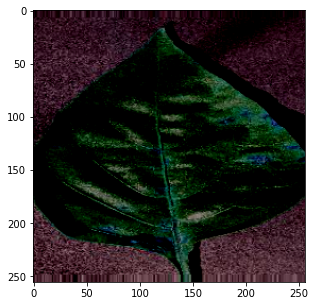

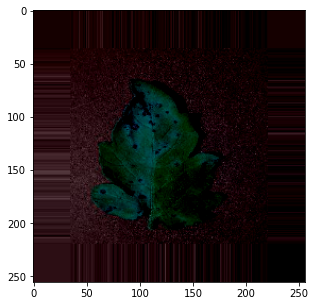

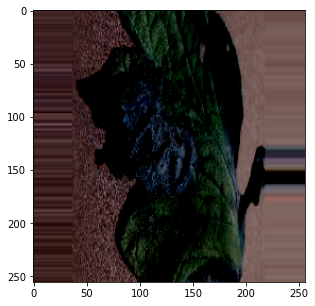

In [7]:
plotImage(t_img[:3], label[:3])

In [8]:
from keras.layers import Dense, Flatten 
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [9]:
base_model = VGG19(input_shape=(256, 256, 3), include_top = False)

80134624/80134624 [==============================] - 0s 0us/step


In [10]:
for layer in base_model.layers:
  layer.trainable= False

In [11]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [20]:
X = Flatten()(base_model.output)
X= Dense(units = 9, activation='softmax')(X)

#creating our model
model = Model(base_model.input, X)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

In [21]:
import tensorflow as tf
tf.keras.losses.CategoricalCrossentropy()
loss = 'categorical_crossentropy'
model.compile(optimizer= 'adam', loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [22]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
es= EarlyStopping(monitor= 'val_accuracy',min_delta=0.01, patience = 3, verbose = 1)

#model check point
mc= ModelCheckpoint(filepath ="veg_model.h5", 
                    monitor= 'val_accuracy', 
                    min_delta=0.01, 
                    patience= 3, 
                    verbose = 1, 
                    save_best_only= True)
cb= [es, mc]

In [23]:
his= model.fit_generator(x_train, steps_per_epoch = 16, epochs= 50, verbose= 1, callbacks= cb, validation_data= x_val, validation_steps = 16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 13.5120 - accuracy: 0.4004 
Epoch 1: val_accuracy improved from -inf to 0.27539, saving model to veg_model.h5
16/16 [==============================] - 902s 58s/step - loss: 13.5120 - accuracy: 0.4004 - val_loss: 2.6423 - val_accuracy: 0.2754
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 5.3782 - accuracy: 0.6934 
Epoch 2: val_accuracy did not improve from 0.27539
16/16 [==============================] - 883s 57s/step - loss: 5.3782 - accuracy: 0.6934 - val_loss: 4.5348 - val_accuracy: 0.2207
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 3.9761 - accuracy: 0.7852 
Epoch 3: val_accuracy did not improve from 0.27539
16/16 [==============================] - 889s 57s/step - loss: 3.9761 - accuracy: 0.7852 - val_loss: 4.9480 - val_accuracy: 0.2266
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss: 3.9351 - accuracy: 0.7718 
Epoch 4: val_accuracy did not improve fro

In [24]:
h= his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

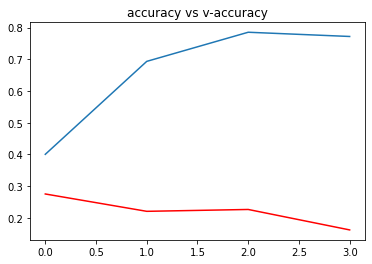

In [26]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c= "red")
plt.title("accuracy vs v-accuracy")
plt.show()

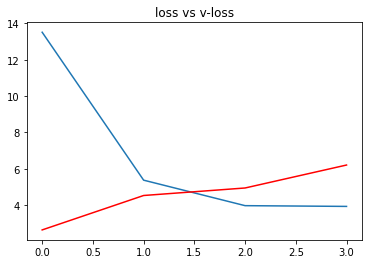

In [25]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c= "red")
plt.title("loss vs v-loss")
plt.show()

In [27]:
#load best model
from keras.models import load_model
model= load_model("/content/veg_model.h5")

In [32]:
ref = dict(zip(list(x_train.class_indices.values()) , list(x_train.class_indices.keys())))
ref

{0: 'Pepper,_bell___Bacterial_spot',
 1: 'Pepper,_bell___healthy',
 2: 'Potato___Early_blight',
 3: 'Potato___Late_blight',
 4: 'Potato___healthy',
 5: 'Tomato___Bacterial_spot',
 6: 'Tomato___Late_blight',
 7: 'Tomato___Leaf_Mold',
 8: 'Tomato___Septoria_leaf_spot'}

In [34]:
def prediction(path):
  img= load_img(path,target_size=(256, 256))
  i=img_to_array(img)
  im=preprocess_input(i)
  img= np.expand_dims(im, axis=0)
  pred = np.argmax(model.predict(img))
  ref = dict(zip(list(x_train.class_indices.values()) , list(x_train.class_indices.keys())))
  print(f" the image belongs to {pred}{ref[pred]}")

In [35]:
#prediction of images into numbers
path = "/content/drive/MyDrive/Dataset Plant Disease/Veg-dataset/test_set/Pepper,_bell___Bacterial_spot/ad921dec-e88f-41d8-9455-0880c69063fc___NREC_B.Spot 9216.JPG"
prediction(path)

1/1 [==============================] - 1s 913ms/step
 the image belongs to 0Pepper,_bell___Bacterial_spot
